In [1]:
from pynq import Overlay, allocate, PL
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

PL.reset()
overlay = Overlay('waveprop.bit')

In [2]:
print('IP blocks :', list(overlay.ip_dict.keys()))

IP blocks : ['waveprop_0', 'axi_dma_waveprop', 'processing_system7_0']


In [3]:
waveprop     = overlay.waveprop_0

dma_recv = overlay.axi_dma_waveprop.recvchannel

CONTROL_REGISTER = 0x0

def get_register_offset(overlay, ip, parameter):
    return overlay.ip_dict[ip]['registers'][parameter]['address_offset']

#WIDTH_REGISTER = get_register_offset(overlay, 'render_0', 'width')
#HEIGHT_REGISTER = get_register_offset(overlay, 'render_0', 'height')
#SAMPLES_REGISTER = get_register_offset(overlay, 'render_0', 'samples_per_pixel')

In [4]:
def process_buffers_fpga(buffer):
    dma_recv.transfer(buffer)
    dma_recv.wait()

def process_fpga():
    
    #hardcoded into the hls ip
    width = 100
    height = 100
    
    buffer = allocate(shape=(width*height,), dtype=np.float32)
        
    for i in range(100):
        waveprop.write(CONTROL_REGISTER, 0x01)
        process_buffers_fpga(buffer)
    
    image = np.zeros((height, width), dtype=np.float32)
    for y in range(height):
        for x in range(width):
            image[y, x] = buffer[x + y*width]
    
    return image

image = process_fpga()

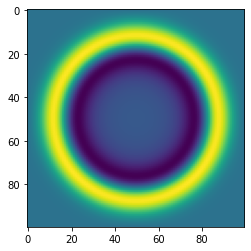

In [5]:
%matplotlib inline
imgplot = plt.imshow(image)
plt.show()